## Analisi del consumo di energia elettrica e di emissioni di CO2 relative alla criptovaluta del BitCoin

**Assetti generali:**
1) Importazione di numpy, pandas e matplotlib.pyplot
2) Riduzione del dataset alle colonne essenziali all'indagine statistica


In [3]:
#importa librerie e passando dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#riduzione delle colonne utilizzate
df = pd.read_csv('BTC_Footprints_v1.csv').iloc[:, :7]

**Calcolo Medie e Valutazione**

1) Calcolo delle medie tra valore **Max** e **Min** del **consumo di energia elettrica** e delle **emissioni di CO2** e **creazione** delle rispettive **colonne** (`(axis=1)`)
2) Definizione e relativa chiamata di metodi (`valutaE` & `valutaCo2`) per la **valutazione del consumo medio rispetto a quello ottimale**, rispettivamente per i due casi analizzati.



In [15]:
#calcolo della media tra massimo e minimo (energia elettrica e emissioni di CO2)
df['Media E.Elettrica'] = df[['BTCENEMAX', 'BTCENEMIN']].mean(axis=1)
df['Media Emissioni CO2'] = df[['BTCEMI_MAX', 'BTCEMI_MIN']].mean(axis=1)

#valutazione del consumo di energia elettrica
def valutaE(row):
    if row['Media E.Elettrica'] < row['BTCENEGUE'] * 1.25:
        return 'Ottimo'
    elif row['Media E.Elettrica'] >= row['BTCENEMAX'] * 1.50:
        return 'Eccessivo'
    elif row['Media E.Elettrica'] >= row['BTCENEMAX'] * 1.25:
        return 'Non Ottimale'
    else:
        return 'Ottimo'

df['Valutazione Consumo E.Eelettrica'] = df.apply(valutaE, axis=1)

#valutazione delle emissioni di CO2
def valutaCo2(row):
    if row['Media Emissioni CO2'] < row['BTCEMI_GUE'] * 1.25:
        return 'Ottimo'
    elif row['Media Emissioni CO2'] >= row['BTCEMI_MAX'] * 1.50:
        return 'Eccessivo'
    elif row['Media Emissioni CO2'] >= row['BTCEMI_MAX'] * 1.25:
        return 'Non Ottimale'
    else:
        return 'Ottimo'

df['Valutazione Emissioni CO2'] = df.apply(valutaCo2, axis=1)

1) Conversione della colonna `'Date'` del DataFrame `df` in oggetti datetime di pandas.  
- `pd.to_datetime` è una funzione che cerca di interpretare le stringhe come date.
- `errors='coerce'` fa sì che, se una stringa non può essere convertita in data, venga inserito `NaT` (Not a Time) invece di generare un errore.
- `dayfirst=False` indica che il formato della data è mese/giorno/anno (MM/DD/YYYY), non giorno/mese/anno.

2) Creazione di due grafici **scatter plot**
- `plt.scatter(df['Date'], df['Media E.Elettrica']` & `plt.scatter(df['Date'], df['BTCENEGUE']`: **2 plottaggi** sul grafico scatter, il 1° rappresenta la **variazione** del valore medio, mentre il secondo, quello del valore ottimale, entrambi **in relazione al dominio del tempo**.


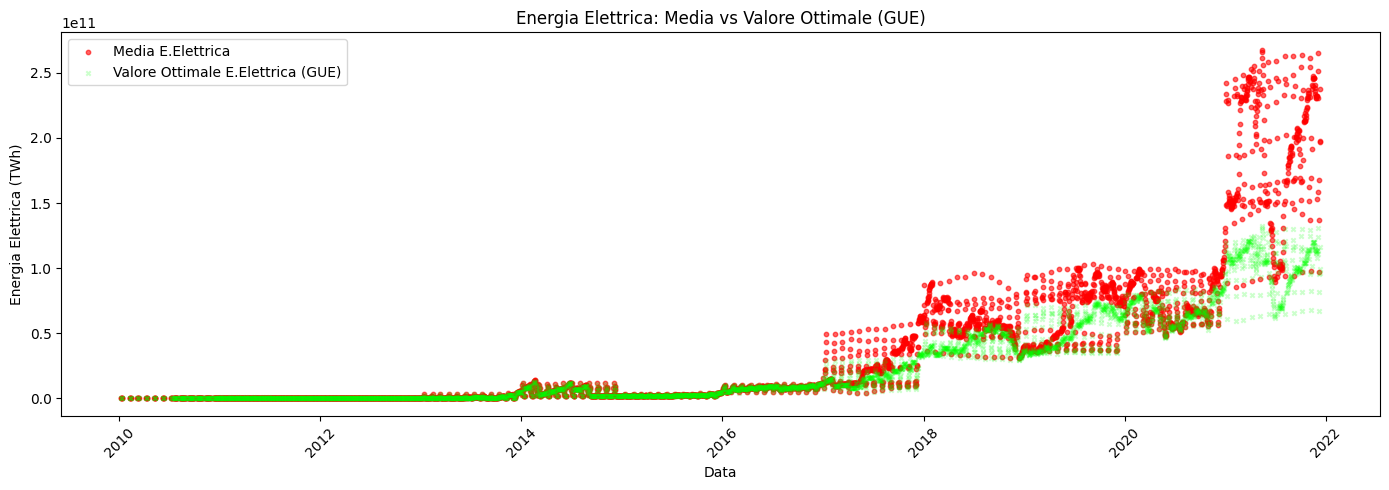

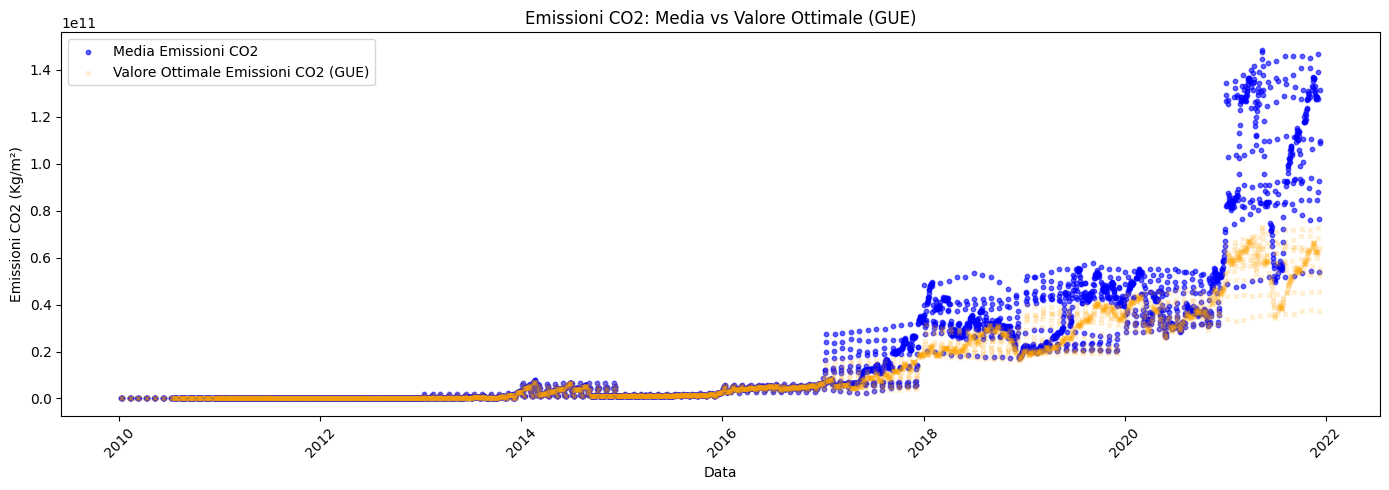

In [16]:
#colonna Date sia in formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)

#grafico per il consumo di energia elettrica
plt.figure(figsize=(14, 5))
plt.scatter(df['Date'], df['Media E.Elettrica'], label='Media E.Elettrica', color='red', s=10, alpha=0.6)
plt.scatter(df['Date'], df['BTCENEGUE'], label='Valore Ottimale E.Elettrica (GUE)', color='lime', marker='x', s=10, alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Energia Elettrica (TWh)')
plt.title('Energia Elettrica: Media vs Valore Ottimale (GUE)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#grafico per le emissioni di CO2
plt.figure(figsize=(14, 5))
plt.scatter(df['Date'], df['Media Emissioni CO2'], label='Media Emissioni CO2', color='blue', s=10, alpha=0.6)
plt.scatter(df['Date'], df['BTCEMI_GUE'], label='Valore Ottimale Emissioni CO2 (GUE)', color='orange', marker='x', s=10, alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Emissioni CO2 (Kg/m²)')
plt.title('Emissioni CO2: Media vs Valore Ottimale (GUE)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## CONSIDERAZIONI 1.
**Analisi dei grafici scatter plot temporali**
1) Energia Elettrica:
- Si osserva una tendenza crescente nel consumo di energia elettrica nel tempo
- La differenza tra il consumo medio e il valore ottimale (GUE) è significativa
- Si notano dei picchi di consumo in determinati periodi, probabilmente correlati all'attività di mining
- Il valore ottimale rimane relativamente stabile, evidenziando un gap crescente con il consumo effettivo

2) Emissioni CO2
- Le emissioni seguono un pattern simile al consumo energetico
- La distanza tra valori medi e ottimali (GUE) è considerevole
- Si evidenzia una correlazione diretta tra consumo energetico ed emissioni
- L'impatto ambientale risulta superiore alle aspettative ottimali

**Calcolo della Variazione Standard**

1) Realizzazione di 2 grafici **box-plot affiancati**  attraverso il metodo (`subplot`), con due (`axes`)

2) Ricerca dei valori **minimo** & **massimo GLOBALI** in modo da avere assi y e quindi **scale equvalenti** è una visione più esplicativa della differenza.



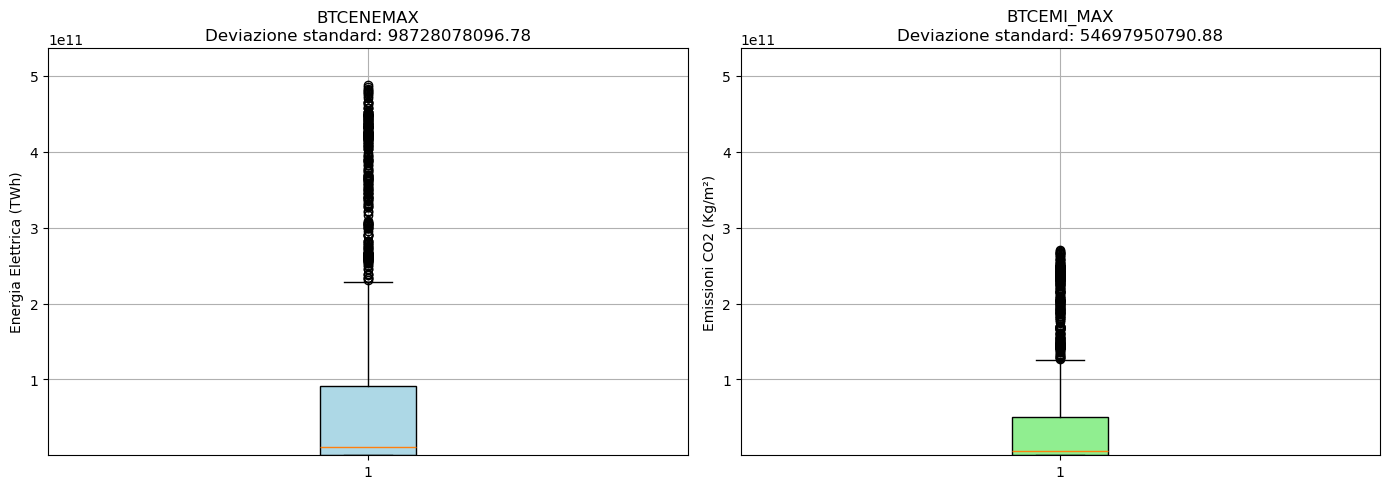

In [13]:
# Crea due box plot affiancati usando subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Troviamo il minimo e massimo globale per impostare gli stessi limiti su entrambi i grafici
min_val = min(df['BTCENEMAX'].min(), df['BTCEMI_MAX'].min())
max_val = max(df['BTCENEMAX'].max(), df['BTCEMI_MAX'].max())

# Primo box plot per BTCENEMAX
bp1 = axes[0].boxplot(df['BTCENEMAX'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[0].set_title(f'BTCENEMAX\nDeviazione standard: {np.std(df["BTCENEMAX"]):.2f}')
axes[0].set_ylabel('Energia Elettrica (TWh)')
axes[0].grid(True)
axes[0].set_ylim([min_val * 0.9, max_val * 1.1])

# Secondo box plot per BTCEMI_MAX
bp2 = axes[1].boxplot(df['BTCEMI_MAX'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title(f'BTCEMI_MAX\nDeviazione standard: {np.std(df["BTCEMI_MAX"]):.2f}')
axes[1].set_ylabel('Emissioni CO2 (Kg/m²)')
axes[1].grid(True)
axes[1].set_ylim([min_val * 0.9, max_val * 1.1])

plt.tight_layout()
plt.show()


## CONSIDERAZIONI 2.



**Analisi dei box plot**

1) Valore massimo E. Elettrica
- La deviazione standard elevata indica una grande variabilità nei consumi
- Presenza di outlier significativi verso l'alto, indicando periodi di consumo eccezionalmente alto
- La distribuzione è asimmetrica con una coda più lunga verso i valori alti

2) Valore massimo Emissioni CO2
- Pattern simile al consumo energetico, confermando la stretta correlazione
- Outlier presenti in modo analogo al consumo energetico
- La variabilità delle emissioni riflette quella dei consumi energetici

## Considerazioni generali

1) **Sostenibilità:**
- Il sistema Bitcoin mostra un impatto ambientale significativo
- La distanza dai valori ottimali è preoccupante in ottica di sostenibilità

2) **Trend:**
- Entrambi i parametri mostrano una tendenza all'aumento
- La crescita non sembra stabilizzarsi nel periodo analizzato

3) **Efficienza:**
- Le valutazioni mostrano spesso risultati "Non Ottimali" o "Eccessivi"
- Necessità di interventi per migliorare l'efficienza energetica

4) **Correlazione:**
- Forte correlazione positiva tra consumo energetico ed emissioni
- Gli interventi migliorativi dovrebbero considerare entrambi gli aspetti

**Raccomandazioni:**
- Implementare tecnologie più efficienti per il mining
- Considerare fonti energetiche rinnovabili
- Monitorare e ottimizzare i periodi di picco
- Sviluppare strategie per avvicinarsi ai valori GUE ottimali
